# COS3a Übung 6
---
Abgabe bis 22.11.2022 12:00 Uhr

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Tutorial

### Mehr über Listen
#### Multidimensionale Listen

Sollen mehrdimensionale Datensätze abgebildet werden, so können in Python auch Listen von Listen erzeugt werden. Auf die einzelnen Einträge lässt sich anschließend über mehrere Index-Operatoren zugreifen:

In [ ]:
md_list = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
md_list

In [ ]:
md_list[0][1]

#### Vorsicht bei der Erzeugung von mehrdimensionalen Listen

Wenn eine multidimensionale Listen erzeugt werden soll, so könnte zunächst eine einfache Liste zu definiert und diese anschließend mehrfach in eine weitere Liste eingetragen werden. Jedoch führt dies aufgrund der Art und Weise wie Python mit Listen umgeht zu unerwarteten Verhalten:

In [ ]:
inner_list = [1, 2, 3, 4, 5]
outer_list = []
for _ in range(5):
    outer_list.append(inner_list)

In [ ]:
for inner in outer_list:
    print(inner)

In [ ]:
outer_list[0][2] = 10
for inner in outer_list:
    print(inner)

Offensichtlich, werden mehrere Einträge in der 2D-Liste verändert, obwohl explizit nur ein Eintrag verändert wurde. Dies liegt daran, dass die äußere Liste `outer_list` mehrere Referenzen zur *selben* inneren Liste `inner_list` besitzt. 

Erzeugen Sie also immer individuel neue Listen bevor Sie diese einer anderen Liste hinzufügen.

In [ ]:
outer_list = []
for _ in range(5):
    outer_list.append([1, 2, 3, 4, 5])

In [ ]:
outer_list[0][2] = 10
for inner in outer_list:
    print(inner)

#### Visualisierung von 2D-Listen als Heatmap

Sie können eine zweidimensionale Liste mithilfe einer *Heatmap* visualisieren. Nutzen Sie dazu die [`plt.imshow`](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow)-Funktion.

In [ ]:
md_list = [[0,1,1,0], [1,0,1,0], [0,1,0,1], [0,0,0,1]]
plt.imshow(md_list, interpolation='nearest', aspect="equal")
plt.axis("off")
plt.show()

## Übung

**Speichern Sie alle Grafiken und Antwortsätze in dieser Übung in eine PDF und geben Sie diese zusammen mit dem Code ab.**

Sie können Diagramme, die über matplotlib.pyplot erstellt wurden über [`plt.savefig(DATEINAME.png)`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) abspeichern.

### Aufgabe 12 (2 Punkte)

Erweitern Sie die Metropolis Monte Carlo Simulation auf eine zweidimensionale reguläre Lösung aus. Jedes Teilchen hat somit vier Nachbarn.

Wählen Sie die energetischen Parameter $\varepsilon_\mathrm{AA}$, $\varepsilon_\mathrm{BB}$ und $\varepsilon_\mathrm{AB}$ so, dass Sie *grob* die folgenden Gitterkonfigurationen erzeugen können:

1. Schachbrett-Anordnung
2. Phasentrennung
3. zufällige Verteilung

Alle anderen Parameter sollen wie folgt sein:


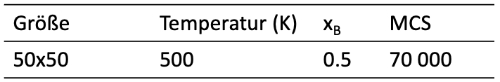

Speichern Sie ein Bild der Lösung für jeden der zuvor genannten Fälle ab. Erstellen Sie ein PDF Dokument, das die Lösungskonfiguration und die dazugehörigen energetischen Parameter dokumentiert und geben Sie das Dokument zusammen mit Ihrem Code ab.

Tipp: Probieren Sie ihren Code zunächst mit weniger MCS aus. (Bei mir dauert eine Simulation etwa 10 min.)

In [ ]:
# Definition der Energievariablen
e_aa = 0.00
e_bb = 0.00
e_ab = 0.00
energy_table = [e_aa, e_ab, e_bb]

# Funktion zur Berechnung der Gitterenergie
def calc_lattice_energy(lattice):

    height = len(lattice)
    width = len(lattice[0])
    
    energy = 0 # Energie des Systems
    for y, row in enumerate(lattice):
        for x, element in enumerate(row):
            # überprüfen wo Nachbarn sitzen unter berücksichtigung periodischer Randbedingung
            neighbor1_pos = ((x - 1) % width, y)
            neighbor2_pos = ((x + 1) % width, y)
            neighbor3_pos = (x, (y + 1) % height)
            neighbor4_pos = (x, (y - 1) % height)

            # energieberechnung
            for (nx, ny) in [neighbor1_pos, neighbor2_pos, neighbor3_pos, neighbor4_pos]:
                neighbor_element = lattice[ny][nx]
                energy += energy_table[element + neighbor_element]/2
    return energy

In [ ]:
calc_lattice_energy([[1,0], [1,1], [0,0]])